In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [445]:
df = pd.read_excel('Company_Data2015-1.xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [446]:
df.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [447]:
df_dict = pd.read_excel('Data_Dictionary.xlsx')
df_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
5,6,Capital Employed,Total amount of capital used for the acquisiti...,Capital_Employed
6,7,Total Debt,The sum of money borrowed by the company and i...,Total_Debt
7,8,Gross Block,Total value of all of the assets that a compan...,Gross_Block
8,9,Net Working Capital,The difference between a company's current ass...,Net_Working_Capital
9,10,Current Assets,All the assets of a company that are expected ...,Curr_Assets


In [448]:
df.columns = df_dict['New Field Name'].to_list()
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [449]:
df.shape

(3586, 67)

In [452]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [453]:
df.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

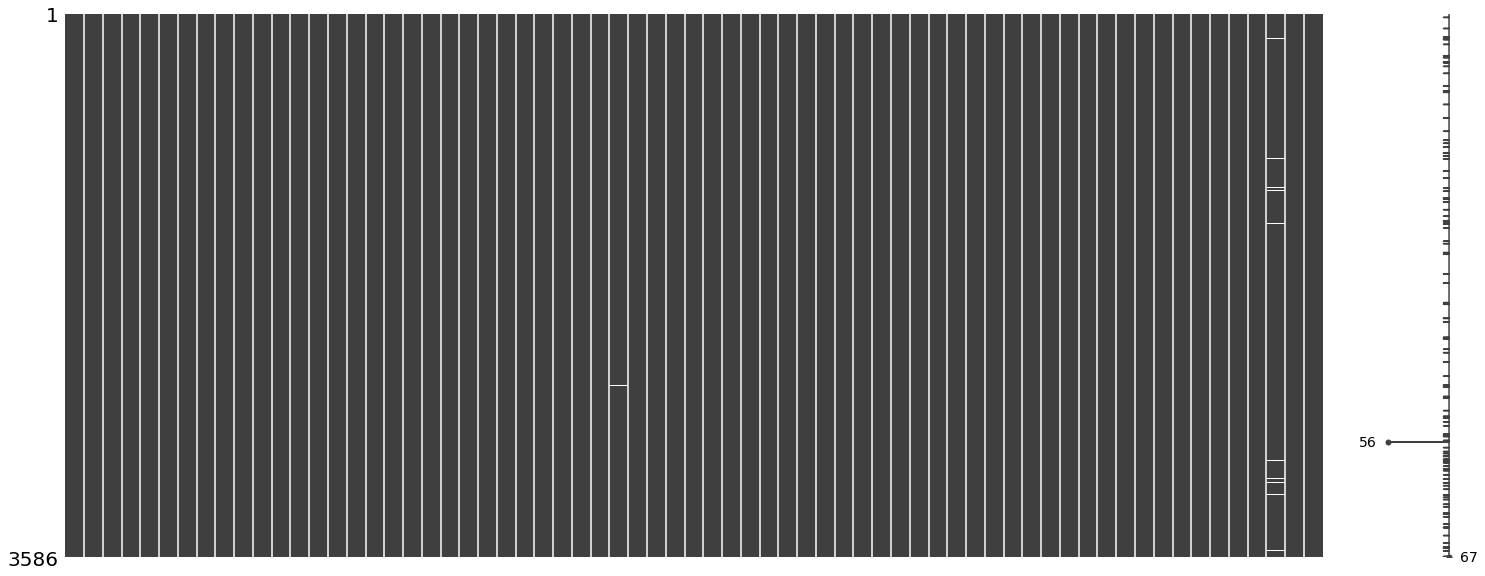

In [159]:
import missingno as msno
msno.matrix(df)

In [160]:
pd.set_option('display.max_rows', 500)

In [454]:
df.isna().sum().sort_values(ascending=False)

Inventory_Vel_Days                   103
Book_Value_Adj_Unit_Curr               4
Inventory_Ratio_Latest                 1
Interest_Cover_Ratio_Latest            1
Curr_Ratio_Latest                      1
Fixed_Assets_Ratio_Latest              1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
PBIDTM_perc_Latest                     1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
PBIT                                   0
Cost_of_Prod                           0
Value_Of_Output                        0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
Value_of_Output_to_Gross_Block         0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
Net_Sales                              0
CP              

In [162]:
df.isna().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Curr_Assets                            0
Curr_Liab_and_Prov                     0
Total_Assets_to_Liab                   0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [163]:
df.isna().sum().sum()

118

In [164]:
df.shape

(3586, 67)

In [165]:
df.dropna().shape

(3478, 67)

### Treating missing values in Inventory_Vel_Days variable

In [166]:
df['Inventory_Vel_Days'].fillna(df['Inventory_Vel_Days'].mean(), inplace = True)

In [167]:
df.isna().sum().sum()

15

### Dropping rows with missing values after fixing Inventory_Vel_Days variable


In [168]:
df=df.dropna()

In [169]:
df.shape

(3581, 67)

In [170]:
df.isna().sum().sum()

0

## Checking for duplicate data

In [172]:
df.duplicated().sum()

0

## Dropping unrequired columns

In [173]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


## Checking distribution of all variables

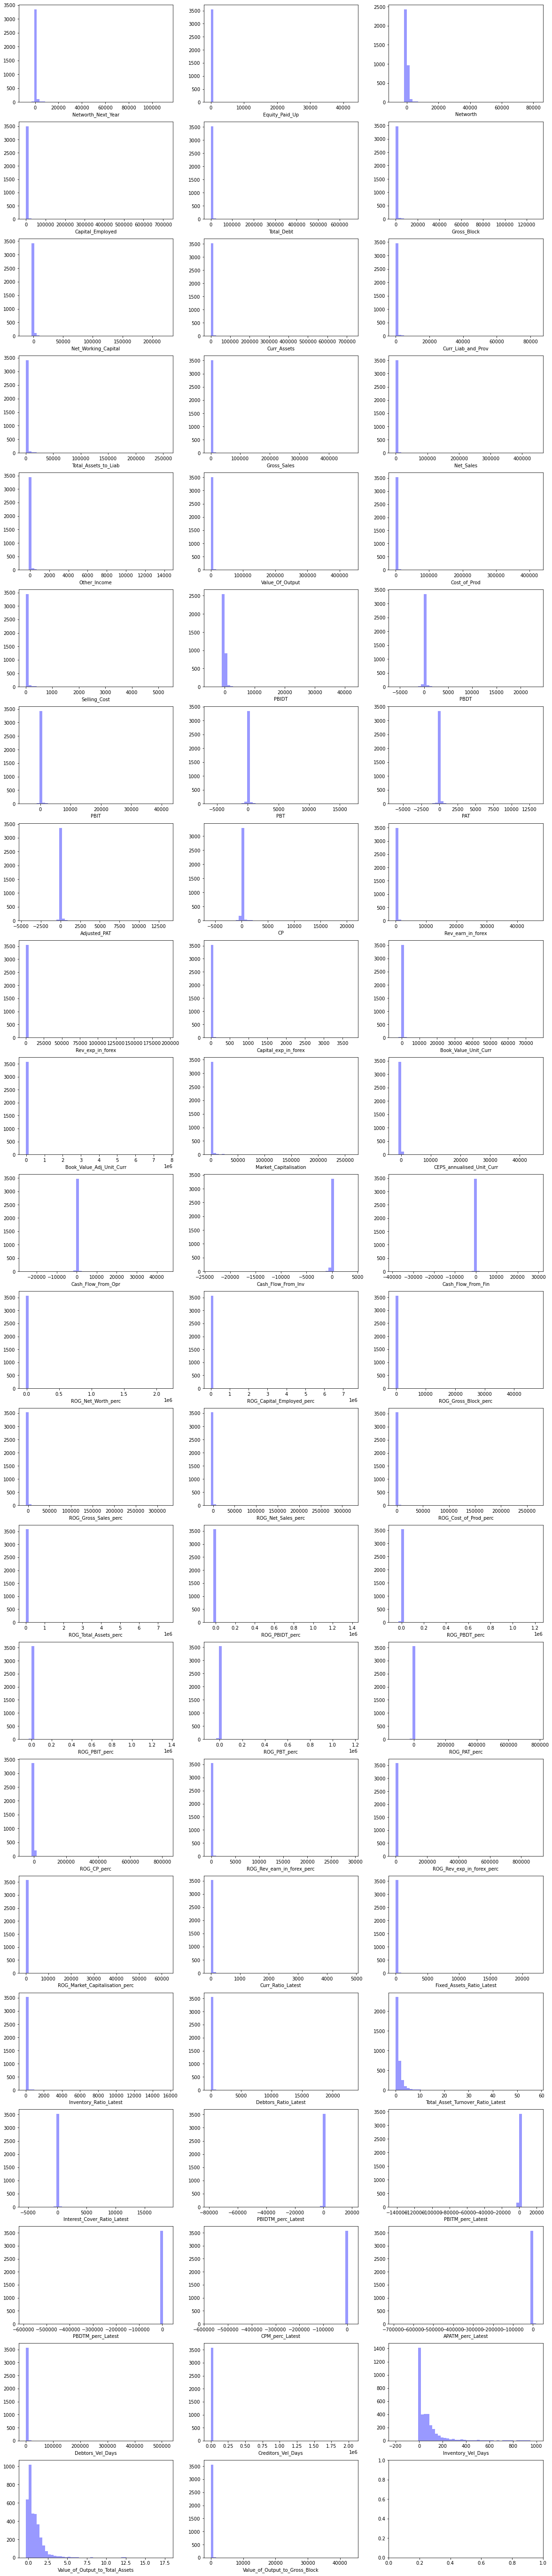

In [174]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 22, ncols = 3)

for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax = ax[i//3, i%3], kde = False, color = 'blue')

## Checking skewness in the data

In [175]:
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

,Skewness
Book_Value_Adj_Unit_Curr,59.835459
ROG_PBIT_perc,58.884442
ROG_PBIDT_perc,58.839674
ROG_PBDT_perc,58.366940
ROG_PBT_perc,57.292161
ROG_Market_Capitalisation_perc,57.290651
ROG_Total_Assets_perc,57.264557
ROG_Rev_exp_in_forex_perc,56.767771
ROG_CP_perc,56.749344
ROG_Capital_Employed_perc,56.397091


## Outlier Analysis

In [176]:
#outlier analysis

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
med = df.median()
IQR = q3 - q1

#checking extreme outliers (3x)
upper_limit = q3 + (3 * IQR)   
lower_limit = q1 - (3 * IQR)

### What percent of values in each column are outliers

In [177]:
((df > upper_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            22.926557
Capital_exp_in_forex                 19.380061
ROG_Rev_earn_in_forex_perc           17.900028
Rev_earn_in_forex                    17.648701
Rev_exp_in_forex                     16.727171
PAT                                  14.884111
Market_Capitalisation                14.744485
PBT                                  14.688634
Adjusted_PAT                         14.632784
CP                                   14.325607
PBDT                                 14.074281
PBIT                                 13.683329
PBIDT                                13.655404
Selling_Cost                         13.292376
Other_Income                         13.236526
Cash_Flow_From_Opr                   13.068975
Networth_Next_Year                   13.041050
Total_Debt                           12.901424
Networth                             12.566322
Capital_Employed                     12.538397
Curr_Ratio_Latest                    12.510472
Curr_Liab_and

In [178]:
((df < lower_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            22.172577
ROG_Rev_earn_in_forex_perc           18.877409
Cash_Flow_From_Inv                   14.800335
Cash_Flow_From_Fin                   13.739179
APATM_perc_Latest                    11.309690
CPM_perc_Latest                       8.209997
PBDTM_perc_Latest                     7.595644
PBITM_perc_Latest                     7.176766
ROG_Gross_Block_perc                  7.092991
Adjusted_PAT                          6.785814
PAT                                   6.646188
ROG_Net_Worth_perc                    6.450712
ROG_PBT_perc                          6.087685
PBT                                   6.059760
ROG_PAT_perc                          5.836359
ROG_CP_perc                           5.585032
ROG_PBDT_perc                         5.473331
PBIDTM_perc_Latest                    5.110304
ROG_PBIT_perc                         4.691427
ROG_PBIDT_perc                        4.300475
Interest_Cover_Ratio_Latest           3.797822
PBDT         

In [179]:
(((df>upper_limit).sum()+(df<lower_limit).sum())/len(df)*100).sort_values(ascending=False)

ROG_Rev_exp_in_forex_perc            45.099134
ROG_Rev_earn_in_forex_perc           36.777436
Cash_Flow_From_Fin                   21.697850
PAT                                  21.530299
Adjusted_PAT                         21.418598
PBT                                  20.748394
Cash_Flow_From_Inv                   19.491762
Capital_exp_in_forex                 19.380061
APATM_perc_Latest                    18.458531
CP                                   17.955878
PBDT                                 17.844178
Rev_earn_in_forex                    17.648701
Rev_exp_in_forex                     16.727171
Cash_Flow_From_Opr                   16.615471
ROG_Gross_Block_perc                 16.140743
PBIT                                 15.805641
Interest_Cover_Ratio_Latest          15.051662
PBIDT                                15.051662
Market_Capitalisation                14.744485
Networth_Next_Year                   14.213907
ROG_Net_Worth_perc                   13.962580
PBITM_perc_La

## Since there are a significant number of records which are outliers, it will change the essence of the data, if we treat outliers. Also the outliers are present due to the nature of the data which comprises small as well as big companies, hence the disparity

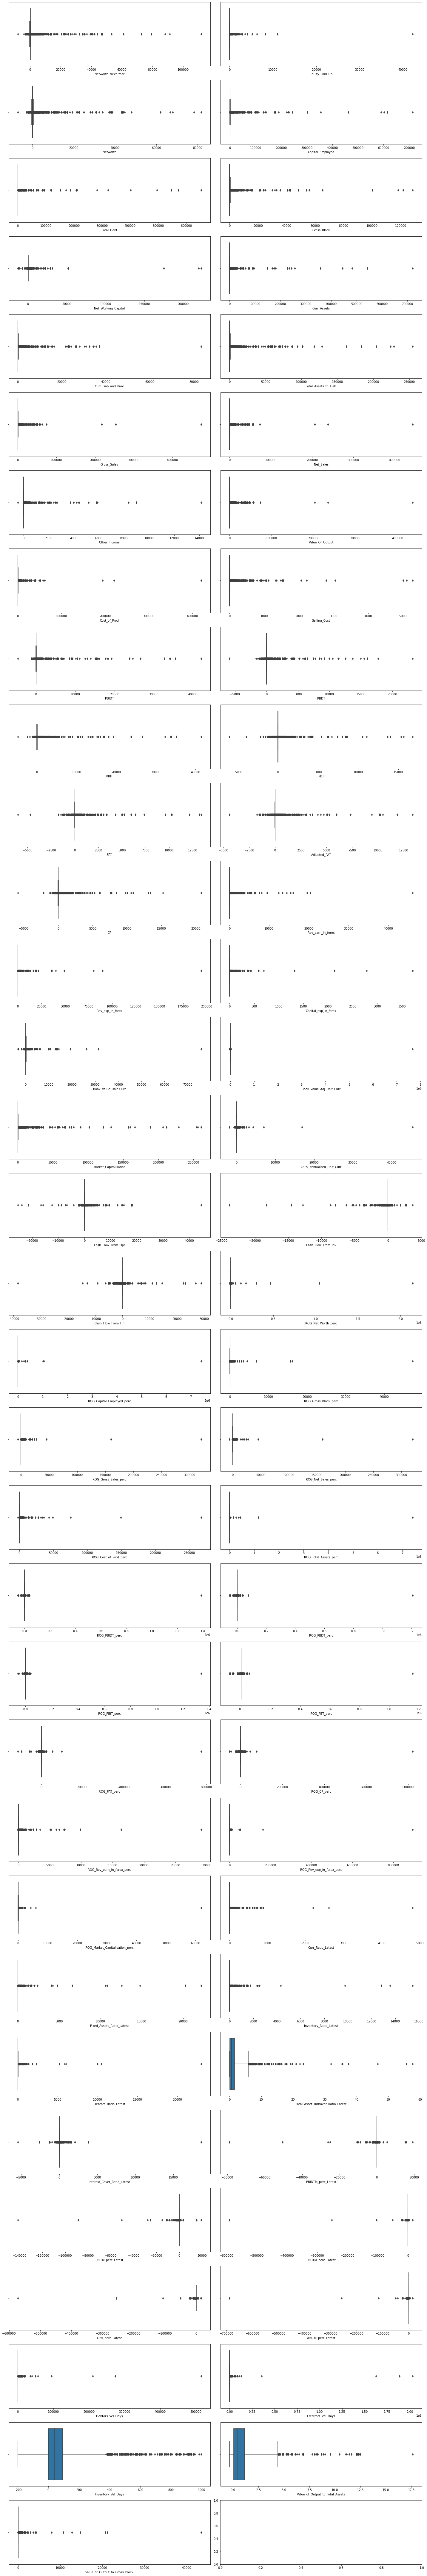

In [180]:
#boxplots with extreme whiskers (+/- 3*IQR)

fig, ax = plt.subplots(figsize = (20, 120), nrows = 33, ncols = 2)

for i, col in enumerate(df.columns):
    sns.boxplot(x = df[col], ax = ax[i//2, i%2], whis = 3) #extreme whiskers
    
plt.tight_layout(pad = 1.1)

## Heatmap

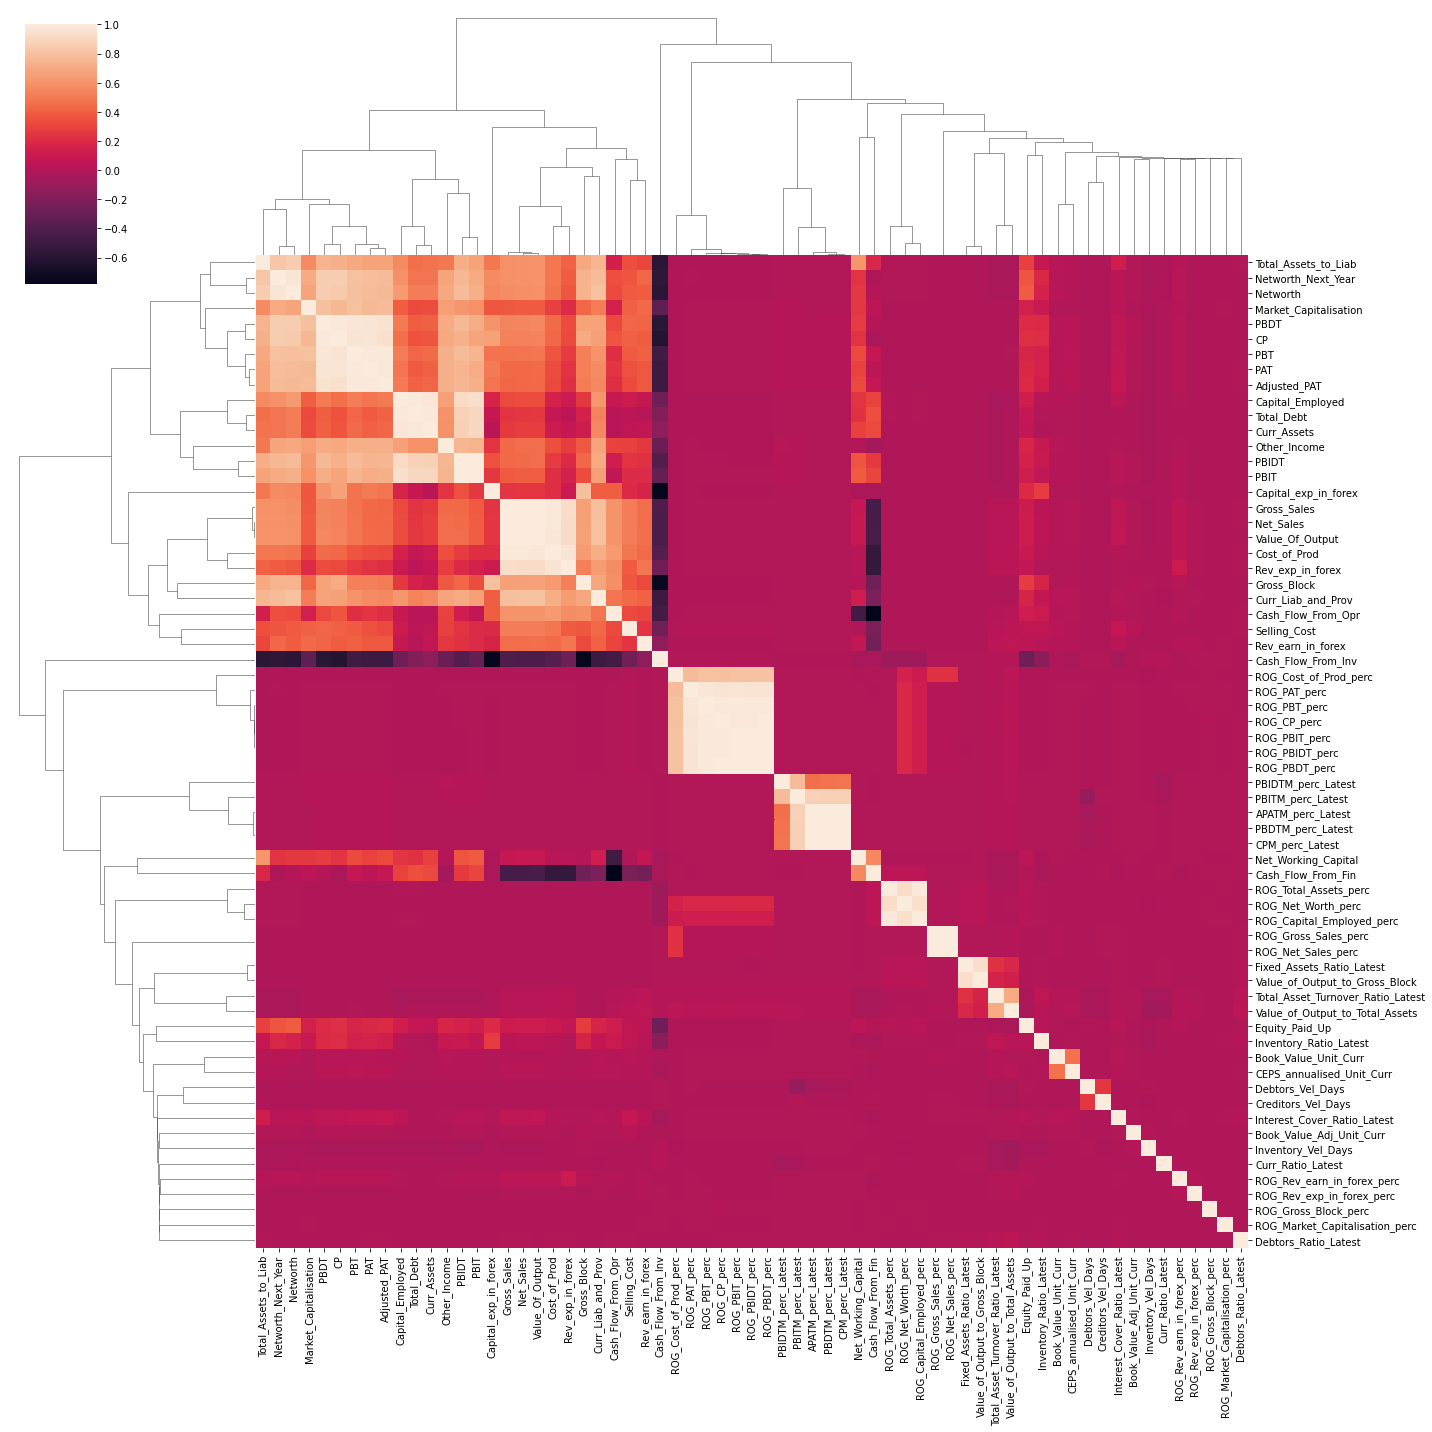

In [181]:
sns.clustermap(df.corr(),figsize=(20,20))

## Analysing Networth_Next_Year variable, since on the basis of this variable we will define the dependent variable

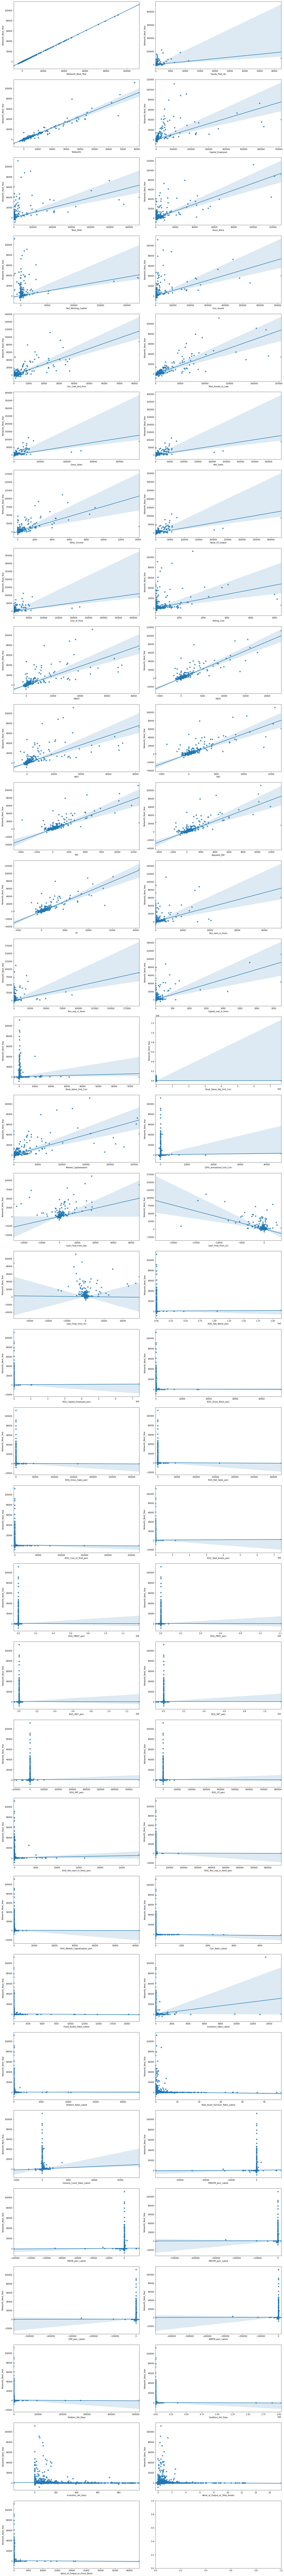

In [182]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(df.columns):
    sns.regplot(x = df[col], y = df['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

## Making the dependent Variable

In [183]:
df['Default']=np.where(df['Networth_Next_Year']<0,1,0)

In [193]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


## Converting to X and y

In [242]:
X = df.drop('Default', axis = 1)
y = df['Default']

## Feature Selection

Since there are too many columns, we need to determine the columns which are related and eliminate them if possible. We will use VIF to determine the collinearity and eliminate using a threshold of 5.

In [243]:
#vif calculation

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [244]:
X=calculate_vif_(X,5)

dropping 'PBIDT' at index: 16
dropping 'PBDT' at index: 16
dropping 'APATM_perc_Latest' at index: 57
dropping 'ROG_Gross_Sales_perc' at index: 34
dropping 'Net_Sales' at index: 11
dropping 'PBDTM_perc_Latest' at index: 53
dropping 'Value_Of_Output' at index: 12
dropping 'ROG_Total_Assets_perc' at index: 34
dropping 'Capital_Employed' at index: 3
dropping 'Gross_Sales' at index: 9
dropping 'Total_Debt' at index: 3
dropping 'ROG_PBDT_perc' at index: 32
dropping 'ROG_PBIT_perc' at index: 32
dropping 'CP' at index: 15
dropping 'PAT' at index: 13
dropping 'ROG_PBIDT_perc' at index: 29
dropping 'Total_Assets_to_Liab' at index: 7
dropping 'ROG_PBT_perc' at index: 28
dropping 'PBT' at index: 11
dropping 'PBIT' at index: 10
dropping 'Cost_of_Prod' at index: 8
dropping 'Networth' at index: 2
dropping 'PBITM_perc_Latest' at index: 36
dropping 'ROG_CP_perc' at index: 25
dropping 'Cash_Flow_From_Fin' at index: 18
dropping 'ROG_Net_Worth_perc' at index: 18
dropping 'Gross_Block' at index: 2
dropping

In [245]:
X

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,419.36,-1076.34,40.50,7.60,0.00,0.00,0.00,0.00,-167.58,-167.58,...,0.00,0.00,-0.20,0.00,0.00,0,0,45.000000,0.00,0.00
1,1954.93,-1098.88,486.86,46.27,40.51,6.35,143.42,141.17,-15.18,-15.18,...,10.35,0.30,-0.84,-10.30,-57.74,29,101,2.000000,0.31,0.24
2,53.84,4496.25,9097.64,9.55,54.83,0.00,86.36,2.27,94.14,94.14,...,0.42,0.00,-2.21,-5279.14,-7723.67,97,558,0.000000,-0.03,-0.26
3,157.30,-2612.42,1034.12,223.85,3.34,0.89,28.88,0.00,-39.64,-39.64,...,9.26,0.00,-0.16,-3.33,-47.70,93,63,2.000000,0.24,1.90
4,50.30,1836.23,4685.81,9.82,1.97,0.00,15.62,0.00,-212.89,-212.89,...,1.28,0.01,-0.73,-295.55,379.79,3887,346,0.000000,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,501.30,0.00,444633.50,8996.35,187.47,0.00,0.00,0.00,247.39,247.39,...,0.00,0.00,0.00,0.00,0.00,0,0,79.644559,0.60,7.76
3582,296.50,2503.86,11554.45,2008.86,249.20,14429.18,19525.06,11.30,114.87,114.87,...,22.31,0.30,3.18,39.92,30.52,13,53,77.000000,0.29,1.00
3583,2427.95,6376.84,89609.82,5815.66,686.53,16009.99,193979.73,294.88,279.95,69.99,...,55.49,2.62,8.60,8.09,5.69,7,30,48.000000,1.42,3.24
3584,8245.46,11449.79,42353.59,2399.39,71.22,3.41,962.27,2788.44,99.03,99.03,...,9.86,0.39,4.35,28.12,19.55,32,69,42.000000,0.36,0.68


In [246]:
df_new=pd.concat([X,y],axis=1)

In [247]:
df_new

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,419.36,-1076.34,40.50,7.60,0.00,0.00,0.00,0.00,-167.58,-167.58,...,0.00,-0.20,0.00,0.00,0,0,45.000000,0.00,0.00,1
1,1954.93,-1098.88,486.86,46.27,40.51,6.35,143.42,141.17,-15.18,-15.18,...,0.30,-0.84,-10.30,-57.74,29,101,2.000000,0.31,0.24,1
2,53.84,4496.25,9097.64,9.55,54.83,0.00,86.36,2.27,94.14,94.14,...,0.00,-2.21,-5279.14,-7723.67,97,558,0.000000,-0.03,-0.26,1
3,157.30,-2612.42,1034.12,223.85,3.34,0.89,28.88,0.00,-39.64,-39.64,...,0.00,-0.16,-3.33,-47.70,93,63,2.000000,0.24,1.90,1
4,50.30,1836.23,4685.81,9.82,1.97,0.00,15.62,0.00,-212.89,-212.89,...,0.01,-0.73,-295.55,379.79,3887,346,0.000000,0.01,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,501.30,0.00,444633.50,8996.35,187.47,0.00,0.00,0.00,247.39,247.39,...,0.00,0.00,0.00,0.00,0,0,79.644559,0.60,7.76,0
3582,296.50,2503.86,11554.45,2008.86,249.20,14429.18,19525.06,11.30,114.87,114.87,...,0.30,3.18,39.92,30.52,13,53,77.000000,0.29,1.00,0
3583,2427.95,6376.84,89609.82,5815.66,686.53,16009.99,193979.73,294.88,279.95,69.99,...,2.62,8.60,8.09,5.69,7,30,48.000000,1.42,3.24,0
3584,8245.46,11449.79,42353.59,2399.39,71.22,3.41,962.27,2788.44,99.03,99.03,...,0.39,4.35,28.12,19.55,32,69,42.000000,0.36,0.68,0


## Split of data based on Default Variable

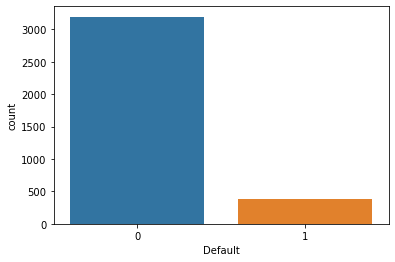

In [248]:
sns.countplot(df_new['Default'])

In [249]:
df_new['Default'].value_counts()

0    3195
1     386
Name: Default, dtype: int64

In [250]:
df_new.groupby(df['Default']).sum()

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
Default,,,,,,,,,,,,,,,,,,,,,
0,214218.10,1462147.61,6968115.21,171778.53,89962.39,464874.78,912428.20,27196.23,586861.65,8085269.63,...,4034.82,68139.00,-124454.16,-463481.66,1982680,5105296,250651.944014,2753.69,220136.43,0
1,11418.37,10954.66,61538.31,2960.36,1662.93,5483.88,6760.43,257.07,-23139.27,-50382.12,...,399.63,-9387.15,-58966.72,-637120.30,182255,2260146,34512.445593,182.03,1773.34,386


## Barplots

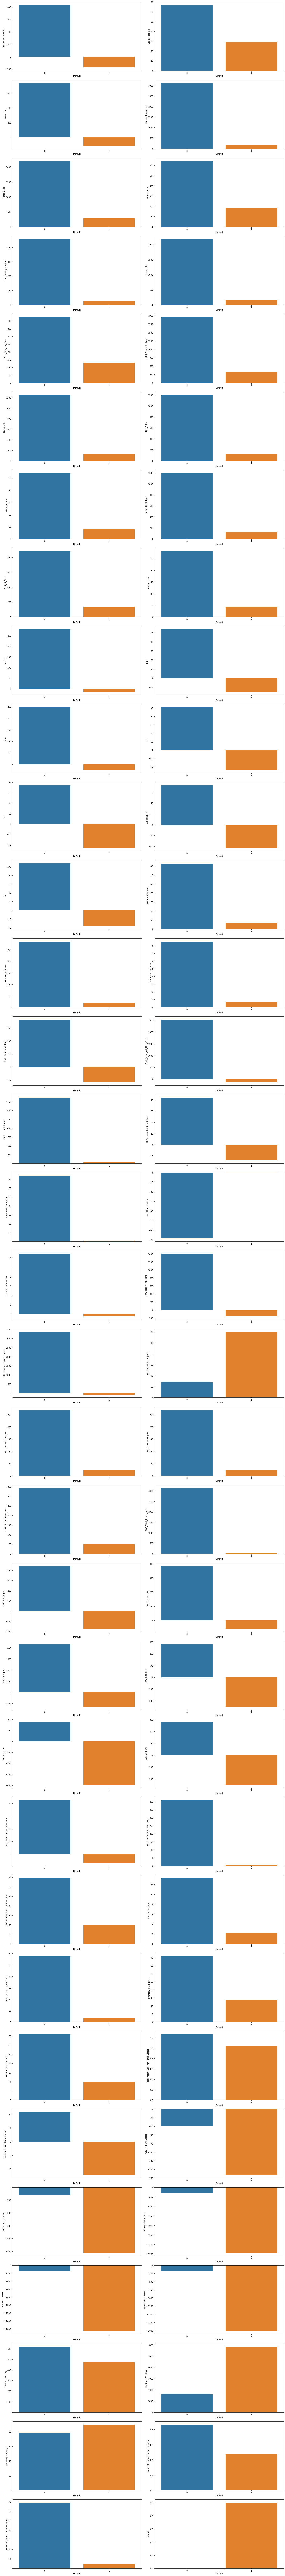

In [251]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)

for i, col in enumerate(df.columns):
    sns.barplot(x = df['Default'], y = df[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

## Since the data set is very imbalanced. We will apply SMOTE and then we will evaluate all models on both SMOTE as well as NON - SMOTE dataset and compare

In [252]:
df_smote=df_new.copy()

In [255]:
print("Before OverSampling the shape of X: {}".format(X.shape))
print("Before OverSampling the shape of y: {}".format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

Before OverSampling the shape of X: (3581, 34)
Before OverSampling the shape of y: (3581,)
Before OverSampling, counts of label '1': 386
Before OverSampling, counts of label '0': 3195 



In [256]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)

In [257]:
X_smote,y_smote=sm.fit_sample(X,y.ravel())

In [259]:
print("After OverSampling the shape of X: {}".format(X_smote.shape))
print("After OverSampling the shape of y: {}".format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_smote==0)))

After OverSampling the shape of X: (6390, 34)
After OverSampling the shape of y: (6390,)
After OverSampling, counts of label '1': 3195
After OverSampling, counts of label '0': 3195 



In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [261]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size = 0.33, random_state = 42, stratify = y_smote)

## Concatinating X and y, so they can be used with statsmodel library

In [262]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [301]:
df_train

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
2218,3.06,40.94,66.67,0.25,7.65,23.25,23.34,4.82,132.56,132.56,...,1.02,1.13,12.62,9.21,119,37,108.0,0.85,0.70,0
498,5.10,0.39,10.15,1.08,0.01,0.00,0.10,0.00,1.24,1.24,...,2.81,2.24,3.60,2.28,2023,1179,0.0,1.13,2.55,0
1154,5.26,8.87,12.57,0.04,0.00,0.00,4.95,0.00,12.07,12.07,...,3.54,1.29,2.84,0.82,53,19,8.0,3.28,18.12,0
1348,6.25,7.51,12.64,0.02,2.14,0.00,0.00,0.00,13.20,13.20,...,0.42,4.60,44.10,24.96,422,642,47.0,0.27,4.03,0
3540,289.37,-892.08,3862.90,582.42,576.87,9443.51,830.61,25.47,369.50,369.50,...,1.50,3812.16,24.45,17.91,12,40,16.0,1.22,5.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,5.25,74.68,117.52,0.12,0.21,0.00,0.00,0.00,0.71,0.71,...,0.63,1.60,12.02,5.48,481,508,0.0,0.47,2.44,0
143,42.56,35.49,174.83,5.29,23.35,269.59,123.31,0.65,-8.40,-8.40,...,5.23,-0.44,-1.26,-5.11,41,30,58.0,1.81,1.87,1
1522,15.50,6.56,7.30,0.00,0.12,0.45,0.01,0.00,0.80,0.80,...,0.13,0.00,8.12,8.97,601,12,629.0,0.15,0.08,0
14,67.27,-197.77,131.31,8.45,0.21,0.00,0.34,0.00,-119.54,-119.54,...,0.00,-1.40,-78.94,-138.85,34,160,81.0,0.52,0.24,1


In [302]:
df_test

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
1682,11.75,3.01,3.38,0.62,0.15,0.00,0.00,0.00,13.30,13.30,...,0.24,1.53,22.67,9.96,17,26,77.0,0.24,0.23,0
3260,25.98,478.87,855.19,28.00,83.82,1032.47,225.05,0.14,332.14,332.14,...,0.82,5.28,33.27,21.13,15,58,150.0,0.68,1.16,0
2156,9.34,7.40,59.65,1.48,0.00,0.00,0.00,0.00,34.56,34.56,...,1.55,2.47,10.54,5.93,39,116,99.0,1.18,2.39,0
3295,7.35,424.45,1960.66,42.31,267.03,1166.70,321.98,3.49,1046.88,1046.88,...,2.08,7.84,10.53,7.27,94,110,58.0,1.04,3.63,0
1311,5.05,2.82,4.30,0.23,0.03,10.55,0.05,0.00,16.15,16.15,...,1.31,3.74,8.52,5.51,98,5,0.0,1.20,1.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,8.90,112.20,130.61,0.30,17.62,279.55,7.73,0.00,91.86,73.49,...,3.66,2.09,5.40,2.94,44,6,34.0,3.18,4.76,0
451,0.35,0.02,0.06,0.00,0.01,0.00,0.00,0.00,0.94,0.94,...,0.24,0.00,0.00,0.00,0,0,0.0,0.20,0.00,0
1058,3.69,2.52,2.72,0.23,0.03,1.41,0.01,0.00,10.67,10.67,...,0.00,1.00,0.00,0.00,29,3,27.0,0.00,0.00,0
2378,5.29,49.48,153.78,3.82,53.80,30.19,6.28,0.00,111.42,111.42,...,5.18,16.93,12.53,8.10,28,34,71.0,2.71,10.72,0


In [293]:
df_train_smote = pd.concat([X_train_smote, pd.DataFrame(y_train_smote,index=X_train_smote.index)], axis = 1)
df_test_smote = pd.concat([X_test_smote, pd.DataFrame(y_test_smote,index=X_test_smote.index)], axis = 1)

In [298]:
df_train_smote.columns=[                   'Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                        'Default']
df_train_smote

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
4223,7.347672,7.020814,15.989639,5.816834,0.560601,6.752390,0.442210,0.000000,-2.623808,-2.623808,...,1.204066,0.047095,-17.784282,-73.110859,66,37,112.552142,0.973436,0.745392,1
3493,58.010000,3321.460000,5247.240000,123.720000,376.330000,2110.860000,2560.660000,72.470000,194.310000,194.310000,...,0.580000,2.240000,18.370000,9.220000,75,31,124.000000,0.580000,1.040000,0
2844,11.560000,135.650000,267.950000,3.250000,11.670000,95.910000,146.260000,2.890000,161.570000,80.790000,...,4.350000,4.550000,5.480000,3.540000,58,55,39.000000,2.120000,3.420000,0
4221,8.509298,0.610611,1.269695,10.223334,0.010000,0.004309,0.008618,0.000000,-0.634595,-0.634595,...,0.453878,-1.723518,3.425494,3.425494,14,398,0.000000,0.359677,0.000000,1
5583,3.960926,-12.222521,1.994483,0.000000,0.001584,0.000000,0.000000,0.000000,-30.534538,-30.534538,...,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,5.590000,19.890000,28.630000,2.420000,1.310000,0.000000,0.000000,0.000000,50.670000,50.670000,...,0.900000,3.150000,14.060000,8.670000,41,38,52.000000,0.950000,2.530000,0
1231,0.500000,5.660000,16.670000,0.020000,1.000000,0.000000,0.000000,0.000000,93.680000,31.230000,...,4.190000,3.970000,7.880000,4.490000,58,5,0.000000,4.020000,12.010000,0
4528,38.063388,70.952532,109.997387,11.169226,2.001923,67.912435,5.000147,1.534478,-23.234465,-23.234465,...,1.040901,-19.118507,-11.458420,-13.064260,95,61,81.695859,0.841460,4.561193,1
3629,3.371029,-0.013994,0.029000,0.084003,0.001999,0.000000,0.000000,0.000000,-0.698709,-0.698709,...,0.000000,0.000000,0.000000,0.000000,0,12,0.000000,0.000000,0.000000,1


In [300]:
df_test_smote.columns=['Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                       'Default']

df_test_smote

,Equity_Paid_Up,Net_Working_Capital,Curr_Assets,Other_Income,Selling_Cost,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,...,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,CPM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
2835,22.380000,78.410000,103.390000,8.640000,21.150000,127.530000,8.420000,0.29,78.560000,78.560000,...,0.840000,21.030000,16.250000,11.690000,72,24,89.000000,0.780000,1.480000,0
397,3.480000,1.590000,1.590000,0.000000,0.000000,0.000000,0.000000,0.00,4.630000,4.630000,...,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0
6079,17.176523,-10.459328,21.625558,6.387596,0.541956,0.068453,0.000000,0.00,-23.919190,-23.919190,...,0.000000,-0.162576,2.045041,-5.305127,27,51,72.731581,0.838552,0.367936,1
1238,3.360000,7.660000,8.350000,0.450000,0.260000,2.030000,0.000000,0.00,22.110000,22.110000,...,0.730000,-1.090000,-3.100000,-9.950000,29,10,254.000000,0.650000,0.880000,0
5033,8.221044,-0.404253,0.508410,0.248232,0.000000,0.000000,0.000000,0.00,-13.115452,-13.115452,...,0.000000,-47.389800,0.000000,0.000000,0,659,750.761849,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,15.910000,5.100000,15.710000,0.070000,0.020000,0.000000,0.000000,0.00,6.280000,6.280000,...,0.420000,-70.330000,-0.450000,4.160000,196,201,202.000000,0.240000,0.280000,0
5567,5.449801,0.012240,0.082071,0.000317,0.000000,0.000000,0.000317,0.00,-1.392903,-1.366660,...,0.007294,0.013320,0.157302,0.256804,0,0,0.000000,0.002537,0.001982,1
705,3.000000,1.770000,1.890000,0.000000,0.000000,0.000000,0.000000,0.00,10.020000,10.020000,...,0.050000,0.000000,38.890000,77.780000,0,0,0.000000,0.050000,0.000000,0
2666,5.240000,53.720000,74.820000,1.640000,2.580000,72.720000,2.170000,0.45,217.570000,217.570000,...,0.480000,3.210000,16.160000,11.140000,112,45,149.000000,0.450000,1.110000,0


In [328]:
col=[]
for i in df_train.columns[:-1]:
    col.append(i)

In [329]:
col

['Equity_Paid_Up',
 'Net_Working_Capital',
 'Curr_Assets',
 'Other_Income',
 'Selling_Cost',
 'Rev_earn_in_forex',
 'Rev_exp_in_forex',
 'Capital_exp_in_forex',
 'Book_Value_Unit_Curr',
 'Book_Value_Adj_Unit_Curr',
 'Market_Capitalisation',
 'CEPS_annualised_Unit_Curr',
 'Cash_Flow_From_Opr',
 'Cash_Flow_From_Inv',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Prod_perc',
 'ROG_PAT_perc',
 'ROG_Rev_earn_in_forex_perc',
 'ROG_Rev_exp_in_forex_perc',
 'ROG_Market_Capitalisation_perc',
 'Curr_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'CPM_perc_Latest',
 'Debtors_Vel_Days',
 'Creditors_Vel_Days',
 'Inventory_Vel_Days',
 'Value_of_Output_to_Total_Assets',
 'Value_of_Output_to_Gross_Block']

In [342]:

text

'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

### Statsmodels Logit Modeling with backward elimination.
#### After each model is built, the variable that has a p-value of >0.05 will be dropped as their coefficients are unreliable. 

In [346]:
model1 = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.118363
         Iterations: 332
         Function evaluations: 402
         Gradient evaluations: 393
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2364
Method:                           MLE   Df Model:                           34
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:20:00   Log-Likelihood:                -283.95
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.349e-203
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [347]:
model1.pvalues.sort_values(ascending = False).head()

Selling_Cost            0.993767
PBIDTM_perc_Latest      0.877953
Capital_exp_in_forex    0.877533
Cash_Flow_From_Inv      0.858975
Equity_Paid_Up          0.839785
dtype: float64

In [348]:
model2 = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.118368
         Iterations: 268
         Function evaluations: 354
         Gradient evaluations: 346
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           33
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:20:38   Log-Likelihood:                -283.97
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.370e-204
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [349]:
model2.pvalues.sort_values(ascending = False).head()

Selling_Cost                 0.995667
Capital_exp_in_forex         0.878467
Cash_Flow_From_Inv           0.855577
Equity_Paid_Up               0.842665
ROG_Rev_exp_in_forex_perc    0.822139
dtype: float64

In [350]:
model3 = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.118368
         Iterations: 277
         Function evaluations: 348
         Gradient evaluations: 336
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           32
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:21:00   Log-Likelihood:                -283.97
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                4.056e-205
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [351]:
model3.pvalues.sort_values(ascending = False).head()

Capital_exp_in_forex         0.877015
Cash_Flow_From_Inv           0.853754
Equity_Paid_Up               0.842104
ROG_Rev_exp_in_forex_perc    0.822163
ROG_Cost_of_Prod_perc        0.800768
dtype: float64

In [353]:
model4 = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.118376
         Iterations: 265
         Function evaluations: 382
         Gradient evaluations: 369
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           31
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:21:38   Log-Likelihood:                -283.98
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                6.949e-206
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [354]:
model4.pvalues.sort_values(ascending = False).head()

Equity_Paid_Up               0.875767
Cash_Flow_From_Inv           0.858017
ROG_Rev_exp_in_forex_perc    0.822646
ROG_Cost_of_Prod_perc        0.801188
Inventory_Vel_Days           0.763947
dtype: float64

In [355]:
model5 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.118381
         Iterations: 259
         Function evaluations: 310
         Gradient evaluations: 298
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           30
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:22:08   Log-Likelihood:                -283.99
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.164e-206
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [356]:
model5.pvalues.sort_values(ascending = False).head()

Cash_Flow_From_Inv           0.834561
ROG_Rev_exp_in_forex_perc    0.823724
ROG_Cost_of_Prod_perc        0.801297
Inventory_Vel_Days           0.761611
Rev_exp_in_forex             0.745916
dtype: float64

In [357]:
model6 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model6.summary())

Optimization terminated successfully.
         Current function value: 0.118390
         Iterations: 243
         Function evaluations: 321
         Gradient evaluations: 307
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           29
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6541
Time:                        19:22:34   Log-Likelihood:                -284.02
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.938e-207
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [358]:
model6.pvalues.sort_values(ascending = False).head()

ROG_Rev_exp_in_forex_perc         0.821508
ROG_Cost_of_Prod_perc             0.799277
Inventory_Vel_Days                0.770362
ROG_Net_Sales_perc                0.705682
Value_of_Output_to_Gross_Block    0.700133
dtype: float64

In [359]:
model7 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model7.summary())

Optimization terminated successfully.
         Current function value: 0.118404
         Iterations: 221
         Function evaluations: 288
         Gradient evaluations: 279
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           28
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6540
Time:                        19:22:58   Log-Likelihood:                -284.05
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                3.197e-208
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [360]:
model7.pvalues.sort_values(ascending = False).head()

ROG_Cost_of_Prod_perc             0.800080
Inventory_Vel_Days                0.769137
ROG_Net_Sales_perc                0.705114
Value_of_Output_to_Gross_Block    0.704529
Rev_exp_in_forex                  0.626914
dtype: float64

In [361]:
model8 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model8.summary())

Optimization terminated successfully.
         Current function value: 0.118421
         Iterations: 220
         Function evaluations: 269
         Gradient evaluations: 259
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           27
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6540
Time:                        19:23:28   Log-Likelihood:                -284.09
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                5.221e-209
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [362]:
model8.pvalues.sort_values(ascending = False).head()

Inventory_Vel_Days                0.763023
Value_of_Output_to_Gross_Block    0.689462
Rev_exp_in_forex                  0.627425
Book_Value_Adj_Unit_Curr          0.596692
ROG_Market_Capitalisation_perc    0.583337
dtype: float64

In [363]:
model9 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model9.summary())

Optimization terminated successfully.
         Current function value: 0.118439
         Iterations: 197
         Function evaluations: 257
         Gradient evaluations: 244
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6539
Time:                        19:23:57   Log-Likelihood:                -284.14
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                8.399e-210
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [364]:
model9.pvalues.sort_values(ascending = False).head()

Value_of_Output_to_Gross_Block    0.696161
Rev_exp_in_forex                  0.633899
Book_Value_Adj_Unit_Curr          0.603501
ROG_Market_Capitalisation_perc    0.584387
ROG_Capital_Employed_perc         0.539057
dtype: float64

In [365]:
model10 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Rev_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model10.summary())

Optimization terminated successfully.
         Current function value: 0.118493
         Iterations: 247
         Function evaluations: 309
         Gradient evaluations: 298
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           25
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6538
Time:                        19:24:33   Log-Likelihood:                -284.26
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.438e-210
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [366]:
model10.pvalues.sort_values(ascending = False).head()

Rev_exp_in_forex                     0.627171
Book_Value_Adj_Unit_Curr             0.599696
ROG_Market_Capitalisation_perc       0.589719
ROG_Capital_Employed_perc            0.540664
Total_Asset_Turnover_Ratio_Latest    0.539922
dtype: float64

In [367]:
model11 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model11.summary())

Optimization terminated successfully.
         Current function value: 0.118514
         Iterations: 230
         Function evaluations: 297
         Gradient evaluations: 284
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           24
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6537
Time:                        19:25:15   Log-Likelihood:                -284.32
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.234e-211
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [368]:
model11.pvalues.sort_values(ascending = False).head()

Book_Value_Adj_Unit_Curr             0.596393
ROG_Market_Capitalisation_perc       0.589476
ROG_Capital_Employed_perc            0.540879
Total_Asset_Turnover_Ratio_Latest    0.535605
ROG_Net_Sales_perc                   0.502645
dtype: float64

In [369]:
model12 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model12.summary())

Optimization terminated successfully.
         Current function value: 0.118588
         Iterations: 176
         Function evaluations: 218
         Gradient evaluations: 212
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           23
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6535
Time:                        19:25:56   Log-Likelihood:                -284.49
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                3.844e-212
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [370]:
model12.pvalues.sort_values(ascending = False).head()

ROG_Market_Capitalisation_perc       0.594895
ROG_Capital_Employed_perc            0.545039
Total_Asset_Turnover_Ratio_Latest    0.533622
ROG_Net_Sales_perc                   0.505357
Debtors_Ratio_Latest                 0.476444
dtype: float64

In [371]:
model13 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model13.summary())

Optimization terminated successfully.
         Current function value: 0.118692
         Iterations: 209
         Function evaluations: 259
         Gradient evaluations: 251
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           22
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6532
Time:                        19:26:31   Log-Likelihood:                -284.74
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                6.943e-213
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [372]:
model13.pvalues.sort_values(ascending = False).head()

ROG_Capital_Employed_perc            0.544502
Total_Asset_Turnover_Ratio_Latest    0.530205
ROG_Net_Sales_perc                   0.509844
Debtors_Ratio_Latest                 0.479674
Debtors_Vel_Days                     0.445311
dtype: float64

In [373]:
model14 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model14.summary())

Optimization terminated successfully.
         Current function value: 0.118950
         Iterations: 167
         Function evaluations: 230
         Gradient evaluations: 214
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           21
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6524
Time:                        19:26:56   Log-Likelihood:                -285.36
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.764e-213
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [374]:
model14.pvalues.sort_values(ascending = False).head()

Total_Asset_Turnover_Ratio_Latest    0.525161
Debtors_Ratio_Latest                 0.484796
ROG_Net_Sales_perc                   0.471883
Debtors_Vel_Days                     0.455352
Cash_Flow_From_Opr                   0.372105
dtype: float64

In [375]:
model15 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model15.summary())
model15.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.119035
         Iterations: 179
         Function evaluations: 232
         Gradient evaluations: 221
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           20
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6522
Time:                        19:27:41   Log-Likelihood:                -285.56
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.900e-214
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Debtors_Ratio_Latest               0.495727
ROG_Net_Sales_perc                 0.469622
Debtors_Vel_Days                   0.453120
Value_of_Output_to_Total_Assets    0.407707
Cash_Flow_From_Opr                 0.386156
dtype: float64

In [376]:
model16 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model16.summary())
model16.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.119191
         Iterations: 184
         Function evaluations: 245
         Gradient evaluations: 236
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           19
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6517
Time:                        19:28:02   Log-Likelihood:                -285.94
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                5.516e-215
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

ROG_Net_Sales_perc                 0.468116
Debtors_Vel_Days                   0.463780
Value_of_Output_to_Total_Assets    0.373491
Creditors_Vel_Days                 0.331756
CPM_perc_Latest                    0.325952
dtype: float64

In [377]:
model17 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model17.summary())
model17.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.119963
         Iterations: 182
         Function evaluations: 238
         Gradient evaluations: 228
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           17
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6495
Time:                        19:28:36   Log-Likelihood:                -287.79
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                5.428e-216
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Debtors_Vel_Days                   0.516109
Value_of_Output_to_Total_Assets    0.347596
Creditors_Vel_Days                 0.322911
ROG_Rev_earn_in_forex_perc         0.308706
CPM_perc_Latest                    0.297290
dtype: float64

In [378]:
model18 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Value_of_Output_to_Total_Assets', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model18.summary())
model18.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.120087
         Iterations: 196
         Function evaluations: 251
         Gradient evaluations: 239
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           16
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6491
Time:                        19:28:57   Log-Likelihood:                -288.09
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                8.760e-217
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Value_of_Output_to_Total_Assets    0.370545
Creditors_Vel_Days                 0.319881
ROG_Rev_earn_in_forex_perc         0.310845
Cash_Flow_From_Opr                 0.296908
CPM_perc_Latest                    0.293026
dtype: float64

In [379]:
model19 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model19.summary())
model19.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.120279
         Iterations: 190
         Function evaluations: 269
         Gradient evaluations: 253
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           15
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6485
Time:                        19:29:19   Log-Likelihood:                -288.55
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.609e-217
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

ROG_Rev_earn_in_forex_perc    0.315277
Creditors_Vel_Days            0.310907
CPM_perc_Latest               0.294052
Cash_Flow_From_Opr            0.248014
Other_Income                  0.234724
dtype: float64

In [380]:
model20 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Other_Income + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model20.summary())
model20.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.120754
         Iterations: 148
         Function evaluations: 204
         Gradient evaluations: 194
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           14
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6472
Time:                        19:29:35   Log-Likelihood:                -289.69
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                5.594e-218
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

Other_Income          0.322996
Creditors_Vel_Days    0.312405
CPM_perc_Latest       0.291928
Cash_Flow_From_Opr    0.211413
Rev_earn_in_forex     0.207297
dtype: float64

In [381]:
model21 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model21.summary())
model21.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121283
         Iterations: 182
         Function evaluations: 243
         Gradient evaluations: 232
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6456
Time:                        19:29:56   Log-Likelihood:                -290.96
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.127e-218
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

Rev_earn_in_forex      0.850155
Cash_Flow_From_Opr     0.683369
Net_Working_Capital    0.683179
Curr_Assets            0.541805
CPM_perc_Latest        0.312296
dtype: float64

In [382]:
model22 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model22.summary())
model22.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121290
         Iterations: 159
         Function evaluations: 215
         Gradient evaluations: 206
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6456
Time:                        19:30:12   Log-Likelihood:                -290.97
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.253e-219
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

Cash_Flow_From_Opr     0.659434
Curr_Assets            0.529568
Net_Working_Capital    0.489686
CPM_perc_Latest        0.312542
Creditors_Vel_Days     0.311823
dtype: float64

In [383]:
model23 = SM.logit(formula = 'Default ~ Net_Working_Capital + Curr_Assets + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model23.summary())
model23.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121333
         Iterations: 149
         Function evaluations: 205
         Gradient evaluations: 195
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           11
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6455
Time:                        19:30:33   Log-Likelihood:                -291.08
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.482e-220
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

Curr_Assets              0.337413
CPM_perc_Latest          0.318619
Creditors_Vel_Days       0.312053
Market_Capitalisation    0.228322
ROG_PAT_perc             0.188699
dtype: float64

In [385]:
model24 = SM.logit(formula = 'Default ~ Net_Working_Capital + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model24.summary())
model24.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121361
         Iterations: 105
         Function evaluations: 141
         Gradient evaluations: 135
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           10
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6454
Time:                        19:31:00   Log-Likelihood:                -291.15
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.513e-221
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
I

CPM_perc_Latest           0.313904
Creditors_Vel_Days        0.312016
Market_Capitalisation     0.229932
ROG_PAT_perc              0.184819
Inventory_Ratio_Latest    0.104725
dtype: float64

In [387]:
model25 = SM.logit(formula = 'Default ~ Net_Working_Capital + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Creditors_Vel_Days', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model25.summary())
model25.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121567
         Iterations: 74
         Function evaluations: 105
         Gradient evaluations: 99
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                            9
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6448
Time:                        19:31:23   Log-Likelihood:                -291.64
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                3.676e-222
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

Creditors_Vel_Days        0.311277
Market_Capitalisation     0.230471
ROG_PAT_perc              0.176026
Inventory_Ratio_Latest    0.102057
Intercept                 0.067417
dtype: float64

In [389]:
model26 = SM.logit(formula = 'Default ~ Net_Working_Capital + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model26.summary())
model26.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.121882
         Iterations: 85
         Function evaluations: 117
         Gradient evaluations: 109
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                            8
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6439
Time:                        19:31:46   Log-Likelihood:                -292.39
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                6.551e-223
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
In

Market_Capitalisation     0.231503
ROG_PAT_perc              0.176266
Inventory_Ratio_Latest    0.100584
Intercept                 0.084882
Net_Working_Capital       0.031098
dtype: float64

In [390]:
model27 = SM.logit(formula = 'Default ~ Net_Working_Capital + Book_Value_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model27.summary())
model27.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.122656
         Iterations: 81
         Function evaluations: 103
         Gradient evaluations: 97
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                            7
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6416
Time:                        19:32:09   Log-Likelihood:                -294.25
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                3.263e-223
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Int

Net_Working_Capital            0.267307
ROG_PAT_perc                   0.179526
Inventory_Ratio_Latest         0.088639
Intercept                      0.048472
Interest_Cover_Ratio_Latest    0.002365
dtype: float64

In [391]:
model28 = SM.logit(formula = 'Default ~ Book_Value_Unit_Curr + CEPS_annualised_Unit_Curr + ROG_PAT_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model28.summary())
model28.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.122694
         Iterations: 57
         Function evaluations: 71
         Gradient evaluations: 65
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6415
Time:                        19:32:25   Log-Likelihood:                -294.34
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                2.584e-224
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

ROG_PAT_perc                   0.170844
Inventory_Ratio_Latest         0.089596
Intercept                      0.047783
Interest_Cover_Ratio_Latest    0.002438
Curr_Ratio_Latest              0.000002
dtype: float64

In [392]:
model29 = SM.logit(formula = 'Default ~ Book_Value_Unit_Curr + CEPS_annualised_Unit_Curr + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model29.summary())
model29.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.123361
         Iterations: 41
         Function evaluations: 57
         Gradient evaluations: 55
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6395
Time:                        19:32:44   Log-Likelihood:                -295.94
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                8.363e-225
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

Inventory_Ratio_Latest         9.442073e-02
Intercept                      2.594959e-02
Interest_Cover_Ratio_Latest    3.621303e-03
Curr_Ratio_Latest              2.074068e-06
CEPS_annualised_Unit_Curr      6.387024e-15
dtype: float64

In [393]:
model30 = SM.logit(formula = 'Default ~ Book_Value_Unit_Curr + CEPS_annualised_Unit_Curr + Curr_Ratio_Latest + Interest_Cover_Ratio_Latest', data = df_train).fit(maxiter = 10000, method = 'bfgs')
print(model30.summary())
model30.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.124653
         Iterations: 48
         Function evaluations: 57
         Gradient evaluations: 57
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2399
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            4
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6358
Time:                        19:33:58   Log-Likelihood:                -299.04
converged:                       True   LL-Null:                       -821.02
Covariance Type:            nonrobust   LLR p-value:                1.067e-224
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Inte

Intercept                      8.276667e-03
Interest_Cover_Ratio_Latest    2.704242e-03
Curr_Ratio_Latest              2.210014e-06
CEPS_annualised_Unit_Curr      2.020357e-14
Book_Value_Unit_Curr           4.275435e-34
dtype: float64

In [394]:
y_prob_pred_train = model30.predict(df_train)

In [395]:
y_class_pred = []
for i in range(0, len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > 0.5:
        a = 1
    else:
        a = 0
    y_class_pred.append(a)

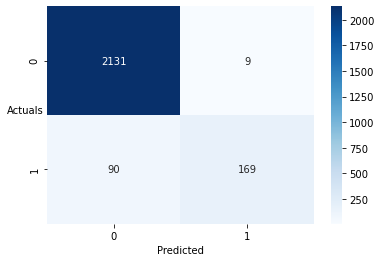

In [397]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [398]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.959     0.996     0.977      2140
           1      0.949     0.653     0.773       259

    accuracy                          0.959      2399
   macro avg      0.954     0.824     0.875      2399
weighted avg      0.958     0.959     0.955      2399



In [399]:
y_prob_pred_30 = model30.predict()

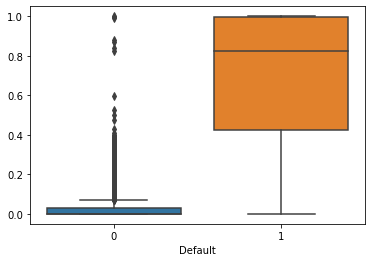

In [400]:
sns.boxplot(x = df_train['Default'], y = y_prob_pred_30)
plt.xlabel('Default');

In [402]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_prob_pred_train)

In [403]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24132824091512983

In [404]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

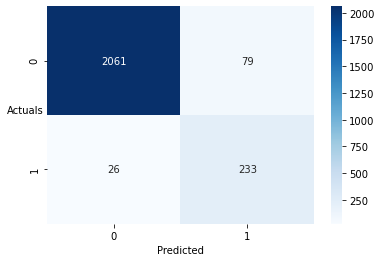

In [405]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [408]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.988     0.963     0.975      2140
           1      0.747     0.900     0.816       259

    accuracy                          0.956      2399
   macro avg      0.867     0.931     0.896      2399
weighted avg      0.962     0.956     0.958      2399



In [409]:
y_prob_pred_test = model30.predict(df_test)

In [410]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

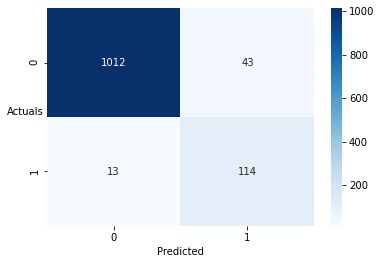

In [411]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [413]:
print(metrics.classification_report(df_test['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.987     0.959     0.973      1055
           1      0.726     0.898     0.803       127

    accuracy                          0.953      1182
   macro avg      0.857     0.928     0.888      1182
weighted avg      0.959     0.953     0.955      1182



## SMOTE Set

In [415]:
model1_smote = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model1_smote.summary())
model1_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.210625
         Iterations: 410
         Function evaluations: 521
         Gradient evaluations: 503
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4246
Method:                           MLE   Df Model:                           34
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6961
Time:                        19:37:28   Log-Likelihood:                -901.68
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

PBIDTM_perc_Latest      0.859589
Equity_Paid_Up          0.840755
Rev_exp_in_forex        0.792235
ROG_Gross_Block_perc    0.728552
Curr_Assets             0.705412
dtype: float64

In [416]:
model2_smote = SM.logit(formula = 'Default ~ Equity_Paid_Up + Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model2_smote.summary())
model2_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.210628
         Iterations: 393
         Function evaluations: 473
         Gradient evaluations: 453
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4247
Method:                           MLE   Df Model:                           33
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6961
Time:                        19:37:57   Log-Likelihood:                -901.70
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Equity_Paid_Up           0.841399
Rev_exp_in_forex         0.792549
ROG_Gross_Block_perc     0.728532
Curr_Assets              0.705482
ROG_Cost_of_Prod_perc    0.487306
dtype: float64

In [417]:
model3_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model3_smote.summary())
model3_smote.pvalues.sort_values(ascending = False).head()

         Current function value: 0.402167
         Iterations: 37
         Function evaluations: 83
         Gradient evaluations: 65
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4248
Method:                           MLE   Df Model:                           32
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.4198
Time:                        19:38:17   Log-Likelihood:                -1721.7
converged:                      False   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                     

Book_Value_Adj_Unit_Curr    0.995610
Cash_Flow_From_Inv          0.888111
Rev_exp_in_forex            0.800729
CPM_perc_Latest             0.606950
Curr_Assets                 0.520872
dtype: float64

In [418]:
model4_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model4_smote.summary())
model4_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.210991
         Iterations: 297
         Function evaluations: 356
         Gradient evaluations: 344
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4249
Method:                           MLE   Df Model:                           31
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6956
Time:                        19:38:44   Log-Likelihood:                -903.25
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Rev_exp_in_forex                  0.773915
ROG_Gross_Block_perc              0.733251
Curr_Assets                       0.703552
ROG_Cost_of_Prod_perc             0.490843
ROG_Market_Capitalisation_perc    0.455896
dtype: float64

In [419]:
model5_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model5_smote.summary())
model5_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211000
         Iterations: 326
         Function evaluations: 388
         Gradient evaluations: 378
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4250
Method:                           MLE   Df Model:                           30
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6956
Time:                        19:39:01   Log-Likelihood:                -903.29
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

ROG_Gross_Block_perc              0.733460
Curr_Assets                       0.704954
ROG_Cost_of_Prod_perc             0.491176
ROG_Market_Capitalisation_perc    0.454498
ROG_Rev_exp_in_forex_perc         0.406319
dtype: float64

In [420]:
model6_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Curr_Assets + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model6_smote.summary())
model6_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211010
         Iterations: 320
         Function evaluations: 368
         Gradient evaluations: 358
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4251
Method:                           MLE   Df Model:                           29
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6956
Time:                        19:39:23   Log-Likelihood:                -903.34
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Curr_Assets                       0.704788
ROG_Cost_of_Prod_perc             0.491474
ROG_Market_Capitalisation_perc    0.454602
ROG_Rev_exp_in_forex_perc         0.406353
Net_Working_Capital               0.288413
dtype: float64

In [421]:
model7_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model7_smote.summary())
model7_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211063
         Iterations: 244
         Function evaluations: 282
         Gradient evaluations: 272
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4252
Method:                           MLE   Df Model:                           28
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6955
Time:                        19:39:54   Log-Likelihood:                -903.56
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

ROG_Cost_of_Prod_perc             0.486819
ROG_Market_Capitalisation_perc    0.463377
ROG_Rev_exp_in_forex_perc         0.409815
Net_Working_Capital               0.260621
Capital_exp_in_forex              0.177829
dtype: float64

In [422]:
model8_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model8_smote.summary())
model8_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211151
         Iterations: 226
         Function evaluations: 273
         Gradient evaluations: 263
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4253
Method:                           MLE   Df Model:                           27
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6954
Time:                        19:40:10   Log-Likelihood:                -903.94
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

ROG_Market_Capitalisation_perc    0.469363
ROG_Rev_exp_in_forex_perc         0.413908
Net_Working_Capital               0.259314
Capital_exp_in_forex              0.176261
ROG_Capital_Employed_perc         0.119214
dtype: float64

In [423]:
model9_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model9_smote.summary())
model9_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211215
         Iterations: 267
         Function evaluations: 327
         Gradient evaluations: 311
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4254
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6953
Time:                        19:40:25   Log-Likelihood:                -904.21
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

ROG_Rev_exp_in_forex_perc            0.418350
Net_Working_Capital                  0.247021
Capital_exp_in_forex                 0.170711
ROG_Capital_Employed_perc            0.118783
Total_Asset_Turnover_Ratio_Latest    0.102462
dtype: float64

In [424]:
model10_smote = SM.logit(formula = 'Default ~Net_Working_Capital + Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model10_smote.summary())
model10_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211411
         Iterations: 260
         Function evaluations: 313
         Gradient evaluations: 301
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4255
Method:                           MLE   Df Model:                           25
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6950
Time:                        19:40:42   Log-Likelihood:                -905.05
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Net_Working_Capital                  0.246522
Capital_exp_in_forex                 0.175425
ROG_Capital_Employed_perc            0.118392
Total_Asset_Turnover_Ratio_Latest    0.106268
Inventory_Vel_Days                   0.091228
dtype: float64

In [428]:
model11_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model11_smote.summary())
model11_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211522
         Iterations: 241
         Function evaluations: 283
         Gradient evaluations: 273
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4256
Method:                           MLE   Df Model:                           24
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6948
Time:                        19:42:46   Log-Likelihood:                -905.53
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Capital_exp_in_forex                 0.160489
ROG_Capital_Employed_perc            0.118354
Total_Asset_Turnover_Ratio_Latest    0.105665
Inventory_Vel_Days                   0.085206
Creditors_Vel_Days                   0.067186
dtype: float64

In [429]:
model12_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model12_smote.summary())
model12_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.211601
         Iterations: 256
         Function evaluations: 303
         Gradient evaluations: 291
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4257
Method:                           MLE   Df Model:                           23
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6947
Time:                        19:43:04   Log-Likelihood:                -905.86
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

ROG_Capital_Employed_perc            0.118446
Total_Asset_Turnover_Ratio_Latest    0.105637
Inventory_Vel_Days                   0.084229
Creditors_Vel_Days                   0.066906
Debtors_Ratio_Latest                 0.051995
dtype: float64

In [430]:
model13_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model13_smote.summary())
model13_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.216173
         Iterations: 240
         Function evaluations: 278
         Gradient evaluations: 267
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4258
Method:                           MLE   Df Model:                           22
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6881
Time:                        19:43:20   Log-Likelihood:                -925.43
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Debtors_Vel_Days                     0.078762
Total_Asset_Turnover_Ratio_Latest    0.075005
Debtors_Ratio_Latest                 0.062167
Inventory_Vel_Days                   0.055658
Creditors_Vel_Days                   0.051705
dtype: float64

In [431]:
model14_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model14_smote.summary())
model14_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.216715
         Iterations: 229
         Function evaluations: 264
         Gradient evaluations: 253
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4259
Method:                           MLE   Df Model:                           21
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6873
Time:                        19:43:37   Log-Likelihood:                -927.76
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Inventory_Vel_Days                   0.075108
Total_Asset_Turnover_Ratio_Latest    0.073117
Debtors_Ratio_Latest                 0.066547
Creditors_Vel_Days                   0.048650
Selling_Cost                         0.031428
dtype: float64

In [432]:
model15_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model15_smote.summary())
model15_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.217090
         Iterations: 239
         Function evaluations: 278
         Gradient evaluations: 267
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4260
Method:                           MLE   Df Model:                           20
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6868
Time:                        19:43:52   Log-Likelihood:                -929.36
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Debtors_Ratio_Latest                 0.069276
Total_Asset_Turnover_Ratio_Latest    0.069013
Creditors_Vel_Days                   0.049761
Selling_Cost                         0.031608
Value_of_Output_to_Total_Assets      0.018615
dtype: float64

In [433]:
model16_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model16_smote.summary())
model16_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.217875
         Iterations: 218
         Function evaluations: 256
         Gradient evaluations: 245
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4261
Method:                           MLE   Df Model:                           19
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6857
Time:                        19:44:10   Log-Likelihood:                -932.72
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Total_Asset_Turnover_Ratio_Latest    0.075280
Creditors_Vel_Days                   0.052487
Selling_Cost                         0.029687
Value_of_Output_to_Total_Assets      0.012452
Inventory_Ratio_Latest               0.009878
dtype: float64

In [434]:
model17_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model17_smote.summary())
model17_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.218428
         Iterations: 256
         Function evaluations: 306
         Gradient evaluations: 295
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4262
Method:                           MLE   Df Model:                           18
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6849
Time:                        19:44:24   Log-Likelihood:                -935.09
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Value_of_Output_to_Total_Assets    0.065417
Creditors_Vel_Days                 0.055174
Selling_Cost                       0.029330
Inventory_Ratio_Latest             0.009651
Interest_Cover_Ratio_Latest        0.006632
dtype: float64

In [435]:
model18_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Creditors_Vel_Days + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model18_smote.summary())
model18_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.218842
         Iterations: 239
         Function evaluations: 291
         Gradient evaluations: 280
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4263
Method:                           MLE   Df Model:                           17
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6843
Time:                        19:44:38   Log-Likelihood:                -936.86
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Creditors_Vel_Days             0.055022
Selling_Cost                   0.023288
Interest_Cover_Ratio_Latest    0.005252
Inventory_Ratio_Latest         0.005192
ROG_Rev_earn_in_forex_perc     0.002728
dtype: float64

In [436]:
model19_smote = SM.logit(formula = 'Default ~ Other_Income + Selling_Cost + Rev_earn_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Sales_perc + ROG_PAT_perc + ROG_Rev_earn_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Value_of_Output_to_Gross_Block', data = df_train_smote).fit(maxiter = 10000, method = 'bfgs')
print(model19_smote.summary())
model19_smote.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.222744
         Iterations: 176
         Function evaluations: 209
         Gradient evaluations: 199
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4281
Model:                          Logit   Df Residuals:                     4264
Method:                           MLE   Df Model:                           16
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.6786
Time:                        19:44:53   Log-Likelihood:                -953.57
converged:                       True   LL-Null:                       -2967.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Selling_Cost                   0.020782
Interest_Cover_Ratio_Latest    0.005550
Inventory_Ratio_Latest         0.004244
ROG_Rev_earn_in_forex_perc     0.002860
CPM_perc_Latest                0.000957
dtype: float64

In [438]:
y_prob_pred_train_smote = model19_smote.predict(df_train_smote)

In [439]:
y_class_pred_smote = []
for i in range(0, len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i] > 0.5:
        a = 1
    else:
        a = 0
    y_class_pred_smote.append(a)

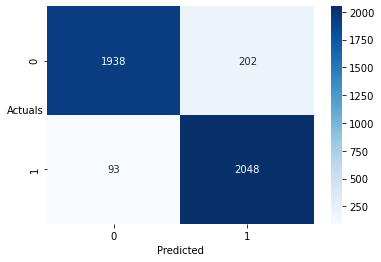

In [440]:
sns.heatmap((metrics.confusion_matrix(df_train_smote['Default'],y_class_pred_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [441]:
print(metrics.classification_report(df_train_smote['Default'], y_class_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.954     0.906     0.929      2140
           1      0.910     0.957     0.933      2141

    accuracy                          0.931      4281
   macro avg      0.932     0.931     0.931      4281
weighted avg      0.932     0.931     0.931      4281



In [442]:
y_prob_pred_smote = model19_smote.predict()

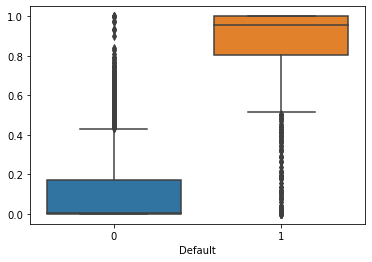

In [443]:
sns.boxplot(x = df_train_smote['Default'], y = y_prob_pred_smote)
plt.xlabel('Default');